In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


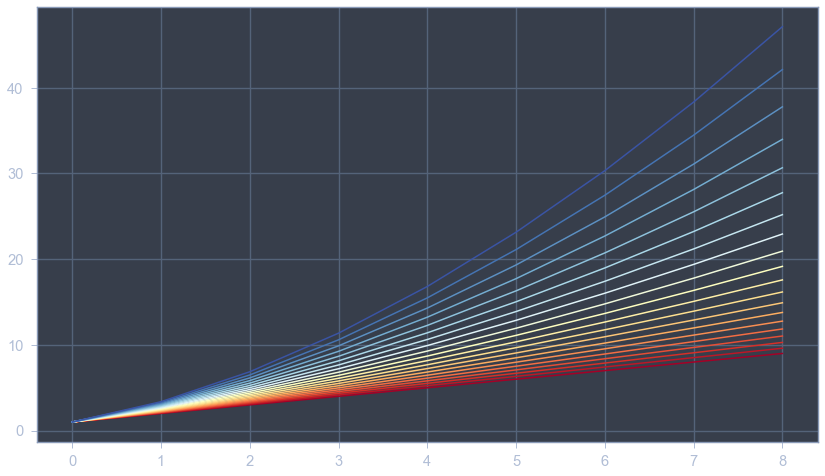

In [74]:
# plt.style.use('seaborn')
# plt.xkcd()
import pandas as pd


N_iter = 20
data_dict = {}
data_dict[0] = [x for x in range(1,10)]

for n in range(1,N_iter):
    data_dict[n] = [x**1.03 for x in data_dict[n-1]]
df = pd.DataFrame(data_dict)


colormap = plt.cm.RdYlBu
N_iter = min(colormap.N, N_iter)
mapcolors = [colormap(int(x * colormap.N / N_iter)) for x in range(N_iter)]
plt.rcParams['figure.figsize'] = [14, 8]

df.plot(legend=False,color=mapcolors)

plt.show()

In [71]:
ages_x = np.arange(25,35)
x_indexes = np.arange(10)
x_indexes
ages_x

array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34])

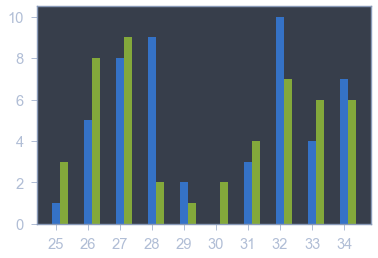

In [5]:
plt.bar(x_indexes, valeurs, width=0.25)
plt.bar(x_indexes+0.25, valeurs2,width=0.25)
plt.xticks(ticks=x_indexes, labels=ages_x)
plt.show()

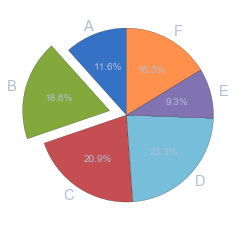

In [6]:
valeurs = [5, 8, 9, 10, 4, 7]
couleurs = ['b', 'g', 'r', 'c', 'm', 'y']
legaxe = ['A', 'B', 'C', 'D', 'E', 'F']            # ID de chaque tranche
explose = (0, 0.2, 0, 0, 0, 0)                     # 0 maintient collé

plt.pie(valeurs, colors=couleurs, labels=legaxe, 
        explode=explose, autopct='%1.1f%%',        # autopct avec chaine de format affiche val de chaque tranche en %
        counterclock=True, shadow=False,
        wedgeprops={'edgecolor': 'black'},
       startangle=90)


plt.show()

<h1>Stack plot</h1>

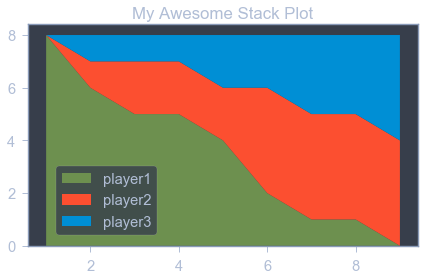

In [7]:
from matplotlib import pyplot as plt

# plt.style.use("fivethirtyeight")


minutes = [1, 2, 3, 4, 5, 6, 7, 8, 9]

player1 = [8, 6, 5, 5, 4, 2, 1, 1, 0]
player2 = [0, 1, 2, 2, 2, 4, 4, 4, 4]
player3 = [0, 1, 1, 1, 2, 2, 3, 3, 4]

labels = ['player1', 'player2', 'player3']
colors = ['#6d904f', '#fc4f30', '#008fd5']

plt.stackplot(minutes, player1, player2, player3, labels=labels, colors=colors)

plt.legend(loc=(0.07, 0.05))

plt.title("My Awesome Stack Plot")
plt.tight_layout()
plt.show()

# Colors:
# Blue = #008fd5
# Red = #fc4f30
# Yellow = #e5ae37
# Green = #6d904f

<h1>Filling Area between plot</h1>

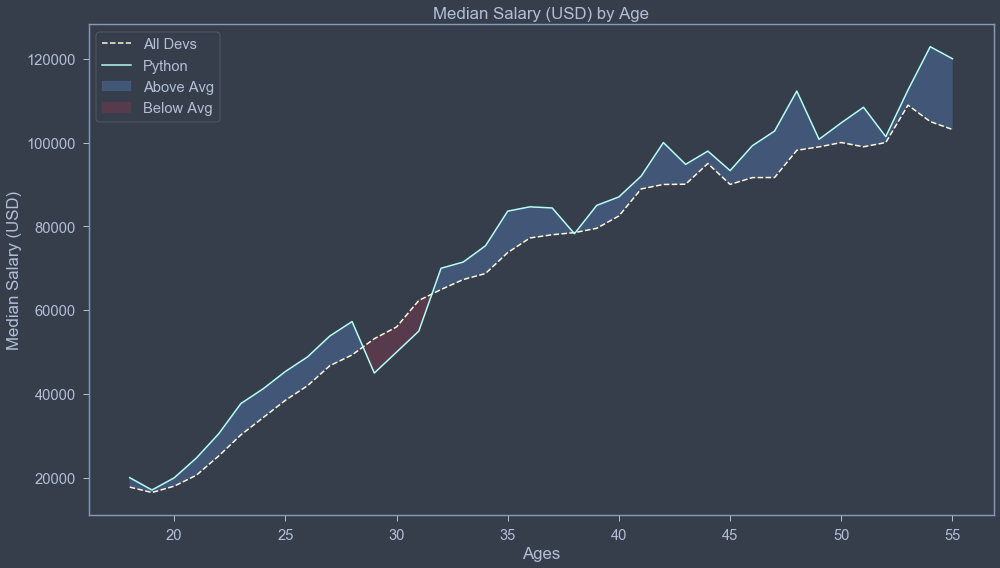

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [14, 8]

data = pd.read_csv('dev_salary.csv')
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']

plt.plot(ages, dev_salaries, color='#FFF8DB',
         linestyle='--', label='All Devs')

plt.plot(ages, py_salaries, label='Python', color='#B5FFF6')

overall_median = 57287

plt.fill_between(ages, py_salaries, dev_salaries,
                 where=(py_salaries > dev_salaries),
                 interpolate=True, alpha=0.25, color='#65A4FF', label='Above Avg')

plt.fill_between(ages, py_salaries, dev_salaries,
                 where=(py_salaries <= dev_salaries),
                 interpolate=True, color='#B83450', alpha=0.25, label='Below Avg')

plt.legend()

plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')

plt.tight_layout()

plt.show()

<h1>Hist</h1>

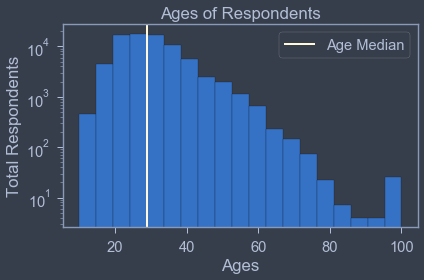

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats

data = pd.read_csv('id_and_age.csv')
ids = data['Responder_id']
ages = data['Age']

# bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
bins = np.linspace(10,100,20)

hist = plt.hist(ages, bins=bins, edgecolor='black', log=True)

median_age = ages.median()

plt.axvline(median_age, color='#FFF8DB', label='Age Median', linewidth=2)

# y = scipy.stats.norm.pdf(ages.sort_values(),ages.mean(),ages.std())
# y = y/max(y) *max(hist[0])
# plt.plot(ages.sort_values(),y, color= '#B5FFF6')

plt.legend()

plt.title('Ages of Respondents')
plt.xlabel('Ages')
plt.ylabel('Total Respondents')

plt.tight_layout()

plt.show()

<h1>Scatter Plots</h1>

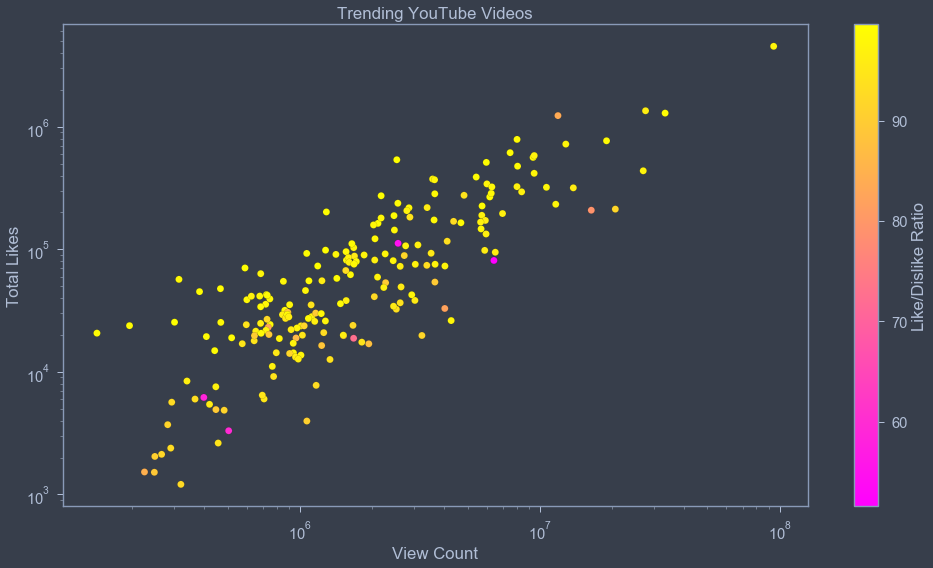

In [26]:

import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('2019-05-31_YT_trending.csv')
view_count = data['view_count']
likes = data['likes']
ratio = data['ratio']

plt.scatter(view_count, likes, c=ratio, cmap='spring',
            edgecolor='black', linewidth=0.1, alpha=1)

cbar = plt.colorbar()
cbar.set_label('Like/Dislike Ratio')

plt.xscale('log')
plt.yscale('log')

plt.title('Trending YouTube Videos')
plt.xlabel('View Count')
plt.ylabel('Total Likes')

plt.tight_layout()

plt.show()


<h1>Time series

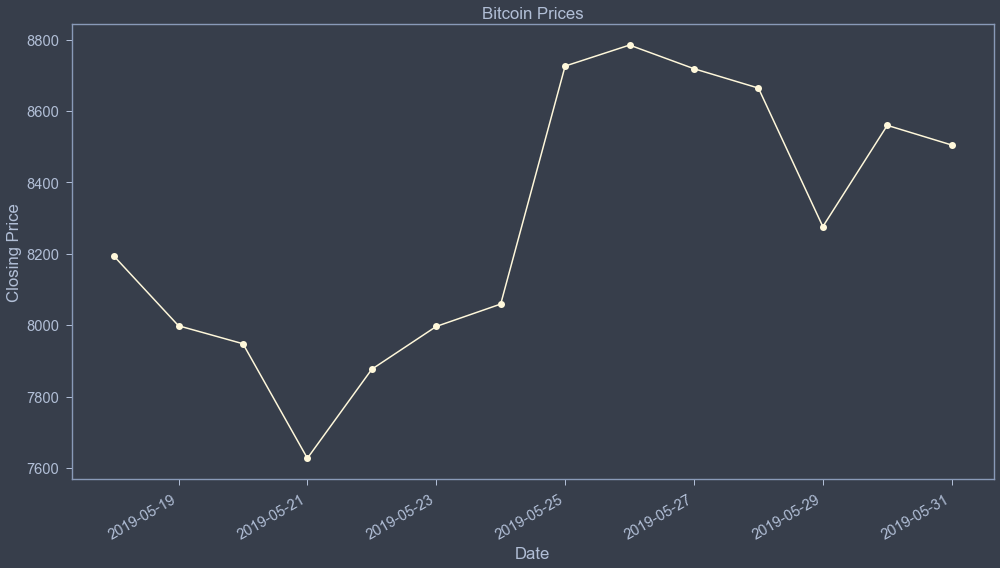

In [9]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

data = pd.read_csv('Bitcoin_prices.csv')

data['Date'] = pd.to_datetime(data['Date'])  # Converti en date
data.sort_values('Date', inplace=True)       # inplace remplace les valeurs directement dans la df

price_date = data['Date']
price_close = data['Close']

plt.figure(figsize=(14,8))
plt.plot_date(price_date, price_close, linestyle='solid', color='#FFF8DB')

plt.gcf().autofmt_xdate()  # gcf() = getcurrentfigure ; autofmt_xdate() = rotate léger les dates sur l'axe x

plt.title('Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')

plt.tight_layout()

plt.show()


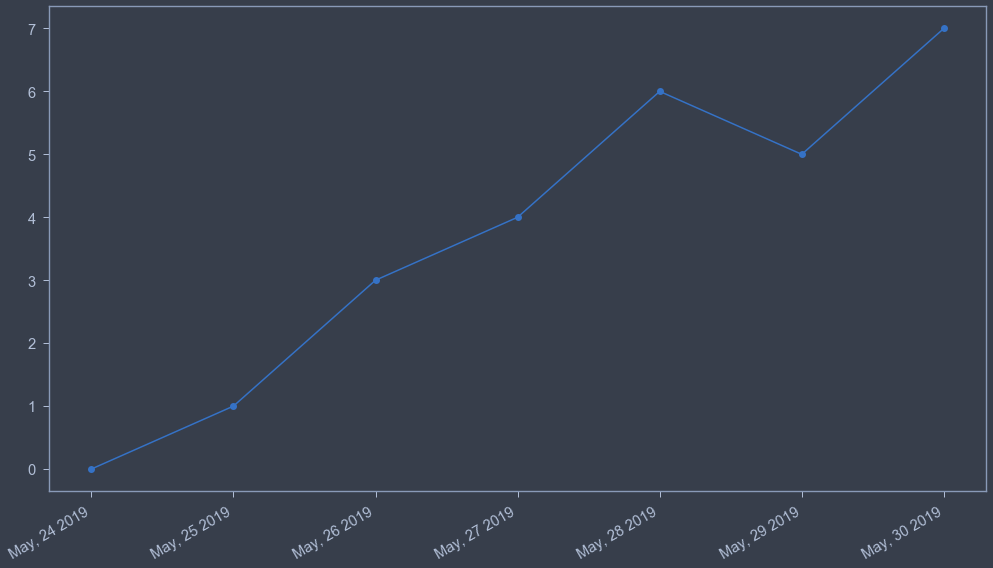

In [12]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

dates = [
    datetime(2019, 5, 24),
    datetime(2019, 5, 25),
    datetime(2019, 5, 26),
    datetime(2019, 5, 27),
    datetime(2019, 5, 28),
    datetime(2019, 5, 29),
    datetime(2019, 5, 30)
]

y = [0, 1, 3, 4, 6, 5, 7]

plt.figure(figsize=(14,8))
plt.plot_date(dates, y, linestyle='solid')

plt.gcf().autofmt_xdate()

date_format = mpl_dates.DateFormatter('%b, %d %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.tight_layout()

plt.show()


<h1>Real-Time plotting

<IPython.core.display.Javascript object>


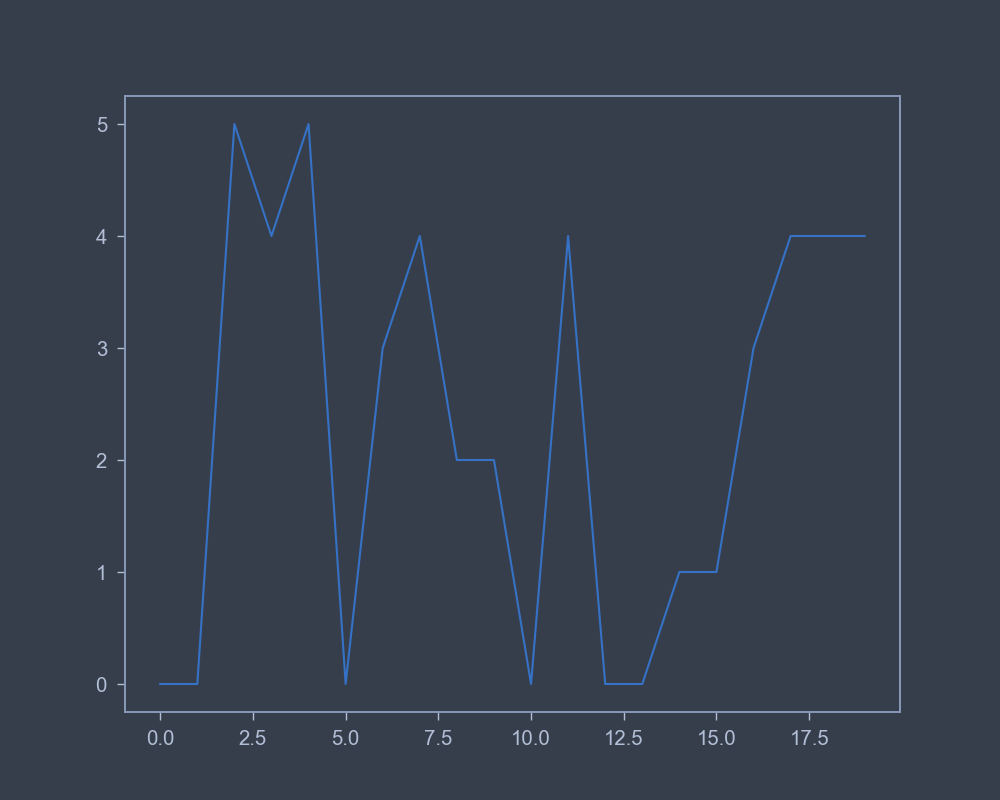

In [1]:
import random
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib Notebook

x_vals = []
y_vals = []

index = count()

def animate(i):
    x_vals.append(next(index))
    y_vals.append(random.randint(0, 5))
    
    plt.cla()  # ClearAxis pour éviter la superposition de courbes lors de l'ajout de données
    plt.plot(x_vals, y_vals)
    
ani = FuncAnimation(plt.gcf(), animate, interval=1000)  # Crée une animation dans la figure spécifiée (plt.gcf()), avec la f° d'animation (animate), avec un timer en ms


plt.tight_layout()
plt.show()

In [ ]:
import random
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def animate(i):
    data = pd.read_csv('data.csv')
    x = data['x_value']
    y1 = data['total_1']
    y2 = data['total_2']

    plt.cla()

    plt.plot(x, y1, label='Channel 1')
    plt.plot(x, y2, label='Channel 2')

    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.grid()


ani = FuncAnimation(plt.gcf(), animate, interval=1000)

plt.tight_layout()
plt.show()


<h1>Subplot

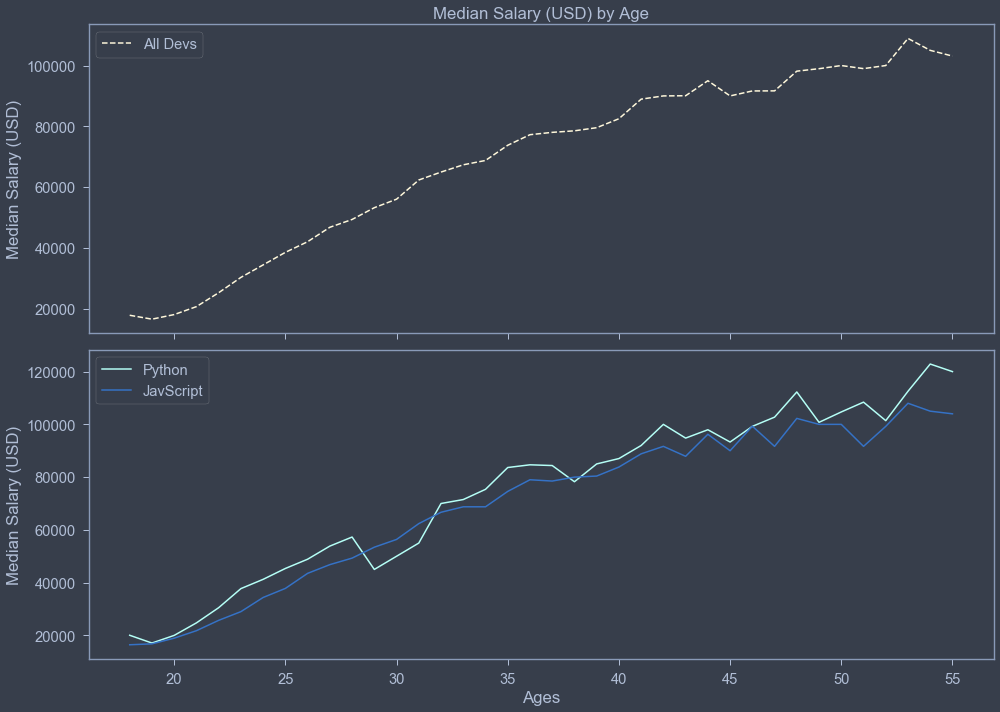

In [23]:
import pandas as pd
from matplotlib import pyplot as plt


# Data

data = pd.read_csv('dev_salary.csv')
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']
 
# Axes are actual plot

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)
fig.set_size_inches(14,10)

ax2.plot(ages, py_salaries, label='Python', color='#B5FFF6')
ax2.plot(ages, js_salaries, label='JavScript')

ax1.plot(ages, dev_salaries, color='#FFF8DB',
         linestyle='--', label='All Devs')


ax1.legend()
ax1.set_title('Median Salary (USD) by Age')
ax1.set_ylabel('Median Salary (USD)')

ax2.legend()
ax2.set_xlabel('Ages')
ax2.set_ylabel('Median Salary (USD)')

plt.tight_layout()

plt.show()

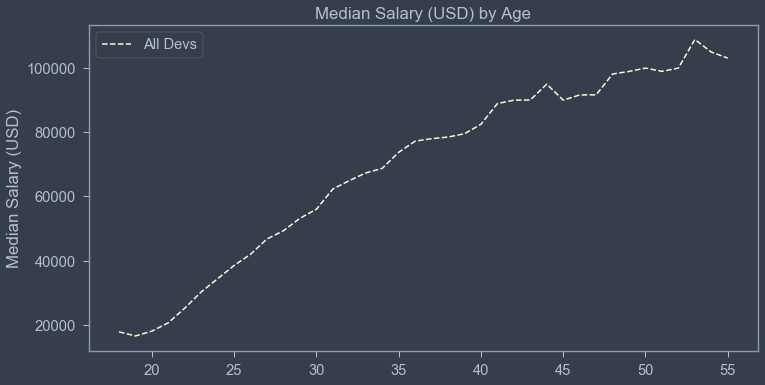

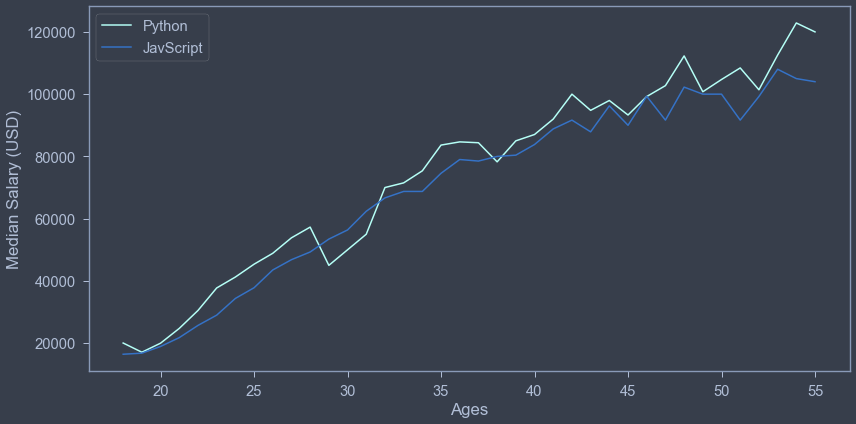

In [1]:
import pandas as pd
from matplotlib import pyplot as plt


# Data

data = pd.read_csv('dev_salary.csv')
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']
 
# Axes are actual plot

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig1.set_size_inches(12,6)
fig2.set_size_inches(12,6)


ax2.plot(ages, py_salaries, label='Python', color='#B5FFF6')
ax2.plot(ages, js_salaries, label='JavScript')

ax1.plot(ages, dev_salaries, color='#FFF8DB',
         linestyle='--', label='All Devs')


ax1.legend()
ax1.set_title('Median Salary (USD) by Age')
ax1.set_ylabel('Median Salary (USD)')

ax2.legend()
ax2.set_xlabel('Ages')
ax2.set_ylabel('Median Salary (USD)')

plt.tight_layout()

plt.show()

fig1.savefig('fig1.png')

<h1> Test multi pour TOMA

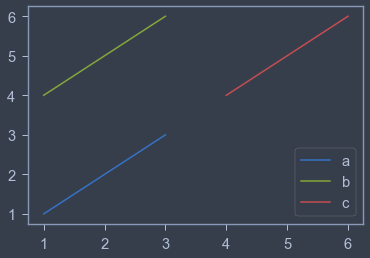

In [1]:
import matplotlib.pyplot as plt
import numpy as np

set_name = ['a','b','c']
dico = {'a': {'x': [1,2,3], 'y':[1,2,3]},
        'b': {'x': [1,2,3], 'y':[4,5,6]},
        'c': {'x': [4,5,6], 'y':[4,5,6]}}

for name in set_name:
    plt.plot(dico[name]['x'],
             dico[name]['y'],
             label=name)

plt.legend()
plt.show()